In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

In [2]:
#training image preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70296 files belonging to 38 classes.


In [4]:
#validation image preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
validation_set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [7]:
print(training_set.class_names)
print(validation_set.class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [8]:
for x,y in training_set:
    print(x, x.shape) #x content
    print(y, y.shape) #y content
    break

tf.Tensor(
[[[[163.5  149.5  148.5 ]
   [159.5  145.5  144.5 ]
   [148.75 134.75 133.75]
   ...
   [169.   157.   161.  ]
   [172.   160.   164.  ]
   [170.25 158.25 162.25]]

  [[152.   138.   137.  ]
   [149.   135.   134.  ]
   [151.5  137.5  136.5 ]
   ...
   [170.   158.   162.  ]
   [165.75 153.75 157.75]
   [165.25 153.25 157.25]]

  [[151.75 137.75 136.75]
   [176.   162.   161.  ]
   [147.75 133.75 132.75]
   ...
   [168.25 156.25 160.25]
   [165.75 153.75 157.75]
   [170.   158.   162.  ]]

  ...

  [[153.75 142.75 146.75]
   [145.75 134.75 138.75]
   [142.5  131.5  135.5 ]
   ...
   [164.   153.   159.  ]
   [161.5  150.5  156.5 ]
   [159.5  148.5  154.5 ]]

  [[136.5  125.5  129.5 ]
   [150.5  139.5  143.5 ]
   [122.25 111.25 115.25]
   ...
   [163.25 152.25 158.25]
   [163.   152.   158.  ]
   [163.   152.   158.  ]]

  [[131.5  120.5  124.5 ]
   [134.   123.   127.  ]
   [144.   133.   137.  ]
   ...
   [164.   153.   159.  ]
   [164.25 153.25 159.25]
   [160.25 149.25 15

In [10]:
##Building Model

In [11]:
cnn = tf.keras.Sequential() # allows you to build a neural network by stacking layers sequentially, one after another

In [12]:
##Building Convolutional Layer1
cnn.add(tf.keras.layers.Input(shape=[128, 128, 3]))

# Add the rest of the layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Dropout(0.25)) #cut layers 25% for reduse overfitting

In [18]:
cnn.add(tf.keras.layers.Flatten()) #2D - 1D

In [19]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [20]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [21]:
#output layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [ ]:
#compiling model
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [24]:
#model training
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 6627s 3s/step - loss: 1.4425 - accuracy: 0.5757 - val_loss: 0.6670 - val_accuracy: 0.7846
Epoch 2/10
2197/2197 [==============================] - 4151s 2s/step - loss: 0.4535 - accuracy: 0.8545 - val_loss: 0.3193 - val_accuracy: 0.8981
Epoch 3/10
2197/2197 [==============================] - 2842s 1s/step - loss: 0.2749 - accuracy: 0.9114 - val_loss: 0.2201 - val_accuracy: 0.9303
Epoch 4/10
2197/2197 [==============================] - 2797s 1s/step - loss: 0.1960 - accuracy: 0.9365 - val_loss: 0.1958 - val_accuracy: 0.9367
Epoch 5/10
2197/2197 [==============================] - 4108s 2s/step - loss: 0.1398 - accuracy: 0.9529 - val_loss: 0.1542 - val_accuracy: 0.9525
Epoch 6/10
2197/2197 [==============================] - 4854s 2s/step - loss: 0.1117 - accuracy: 0.9633 - val_loss: 0.1359 - val_accuracy: 0.9558
Epoch 7/10
2197/2197 [==============================] - 2713s 1s/step - loss: 0.0919 - accuracy: 0.9700 - val_loss: 0.1341 -

In [25]:
#model evaluvation

In [26]:
train_loss,train_acc = cnn.evaluate(training_set)

2197/2197 [==============================] - 573s 261ms/step - loss: 0.0475 - accuracy: 0.9847


In [27]:
print(train_loss,train_acc)

0.04752376303076744 0.9846790432929993


In [28]:
val_loss,val_acc = cnn.evaluate(validation_set)

550/550 [==============================] - 90s 163ms/step - loss: 0.1472 - accuracy: 0.9572


In [29]:
print(val_loss,val_acc)

0.14719438552856445 0.9572046399116516


In [30]:
cnn.save("trained_model.keras")

In [31]:
training_history.history

{'loss': [1.4425272941589355,
  0.4535423815250397,
  0.27488407492637634,
  0.19602374732494354,
  0.13980130851268768,
  0.11174269020557404,
  0.09194829314947128,
  0.076084665954113,
  0.06565535813570023,
  0.057322289794683456],
 'accuracy': [0.5757084488868713,
  0.854500949382782,
  0.9114459156990051,
  0.9364544153213501,
  0.9528849720954895,
  0.9633265137672424,
  0.9699556231498718,
  0.9752190709114075,
  0.9794440865516663,
  0.9816490411758423],
 'val_loss': [0.666997492313385,
  0.31925785541534424,
  0.22011473774909973,
  0.1958351731300354,
  0.15418080985546112,
  0.13591255247592926,
  0.134102001786232,
  0.1611059159040451,
  0.10330893844366074,
  0.14719431102275848],
 'val_accuracy': [0.7846004962921143,
  0.8980764746665955,
  0.9302868247032166,
  0.9367175102233887,
  0.9525381326675415,
  0.9558388590812683,
  0.9586273431777954,
  0.9532210230827332,
  0.969041645526886,
  0.9572046399116516]}

In [32]:
#Recording History
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history , f)

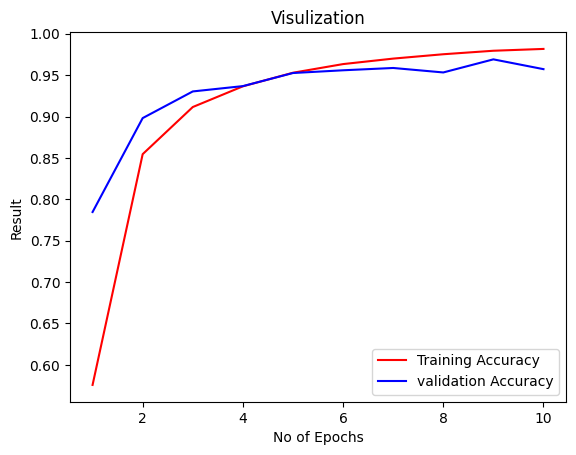

In [33]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Result")
plt.title("Visulization")
plt.legend()
plt.show()